In [ ]:
import sys
sys.path.append("/media/janis/Storage1/development/faimed3d/")

In [ ]:
from faimed3d.all import *

In [ ]:
#import inspect
#inspect.getmodule(TensorDicom3D)

In [ ]:
from ipywidgets import interactive, widgets
from IPython.display import display
import matplotlib.pyplot as plt
from itertools import chain, islice

In [ ]:
image = TensorDicom3D.create('/media/scaleout/vahldiek/MRI/SIJ/TRAINING_FINAL/01001/T1')
image2 = TensorDicom3D.create('/media/scaleout/vahldiek/MRI/SIJ/TRAINING_FINAL/01004/T1')

In [ ]:
class DatasetExplorerBasicView():
    
    def __init__(self, x:TensorDicom3D, y:str=None, prediction:str=None, description: str=None, figsize=(5, 5), cmap:str='bone'):
        
        self.x = x
        self.slice_range = (1, len(x))
        self.cmap = cmap
        self.y = y
        self.prediction = prediction
        self.description = description
        
        self.resize(figsize)
    
    def _plot_slice(self, im_slice):
        fig, ax = plt.subplots(1, 1, figsize=self.figsize)
        ax.imshow(self.x[im_slice-1, :, :], cmap=self.cmap)
        plt.axis('off')
        plt.show()
        
    def resize(self, figsize):
        
        self.figsize = figsize
        
        items_in_box = []
        
        if self.description:
            description_label = widgets.Label(
                self.description, 
                layout=widgets.Layout(
                    width='100%', 
                    display='flex', 
                    justify_content="center"
                )
            )
            items_in_box.append(description_label)
        
        if self.y:
            label_text = 'Class: '+self.y
            if self.prediction:
                label_text = label_text + '  |  Prediction: ' + self.prediction 
            y_label =  widgets.Label(
                label_text, 
                layout=widgets.Layout(
                    width='100%', 
                    display='flex', 
                    justify_content="center"
                )
            )
            items_in_box.append(y_label)
        
        slice_slider = widgets.IntSlider(
            min=min(self.slice_range), 
            max=max(self.slice_range), 
            step=1, 
            value=max(self.slice_range)//2, 
            description='', 
            continuous_update=True,
            readout = False,
            layout=widgets.Layout(width='99%', min_width='200px'),
            style={'description_width': 'initial'}
        )
        
        image_output = widgets.interactive_output(
                                self._plot_slice,
                                {'im_slice': slice_slider}
        )
        
        items_in_box.append(image_output)
        items_in_box.append(slice_slider)
            
        self.vbox=widgets.VBox(
            items_in_box,
            layout=widgets.Layout(
                border = 'solid 1px lightgrey', 
                margin = '10px 5px 0px 0px', 
                padding =  '5px'
            )
        )
        
        self.box = widgets.HBox(children=[self.vbox])

    def show(self):
        display(self.box)

In [ ]:
plot = DatasetExplorerBasicView(image, y='1', prediction='0', description='/media/images/t2.nii.gz')
plot.show()

In [ ]:
class DatasetExplorerListView():
    
    def __init__(self, images:list, num:int=3, figsize=(5, 5), cmap:str='bone'):
        
        # images = list of TensorDicom3D objects
        
        self.images = images
        self.cmap = cmap
        self.num = num
        
    def chunk(self, seq, chunksize, process=iter):
        """ Yields items from an iterator in iterable chunks."""
        it = iter(seq)
        while True:
            try:
                yield process(chain([next(it)], islice(it, chunksize - 1)))
            except StopIteration:
                return
        
    def show(self):
        
        all_boxes = []
        for image in self.images:
            basic_view = DatasetExplorerBasicView(image, figsize=(5, 5), cmap='bone')
            all_boxes.append(basic_view.vbox)
            
        vboxes = []
        
        for chunked_boxes in self.chunk(all_boxes, self.num, list):
            vboxes.append(widgets.HBox(children=chunked_boxes))
        display(widgets.VBox(children=vboxes))

In [ ]:
DatasetExplorerListView([image, image2, image2, image, image]).show()

(array([5.12937e+05, 3.27910e+04, 3.97560e+04, 5.42040e+04, 7.24390e+04,
        8.65610e+04, 8.99430e+04, 9.36040e+04, 8.99770e+04, 8.26200e+04,
        8.12910e+04, 7.59130e+04, 7.35920e+04, 7.22010e+04, 7.82790e+04,
        7.87530e+04, 6.90870e+04, 6.04970e+04, 4.86570e+04, 3.86070e+04,
        3.39940e+04, 3.00080e+04, 2.72470e+04, 2.46450e+04, 2.43030e+04,
        2.37180e+04, 2.14350e+04, 2.16050e+04, 1.96710e+04, 1.74680e+04,
        1.66760e+04, 1.49380e+04, 1.40250e+04, 1.23440e+04, 1.26010e+04,
        1.17800e+04, 1.09080e+04, 1.09200e+04, 1.05400e+04, 9.76500e+03,
        9.86400e+03, 9.75700e+03, 9.65400e+03, 9.10300e+03, 9.95200e+03,
        1.01140e+04, 9.71100e+03, 1.05790e+04, 1.06370e+04, 1.01740e+04,
        1.12880e+04, 1.09990e+04, 1.09640e+04, 1.05500e+04, 1.11210e+04,
        1.10580e+04, 1.04030e+04, 1.02620e+04, 9.45200e+03, 8.38400e+03,
        7.76200e+03, 6.92200e+03, 5.94900e+03, 4.94100e+03, 4.47300e+03,
        3.97100e+03, 3.21900e+03, 2.91900e+03, 2.29

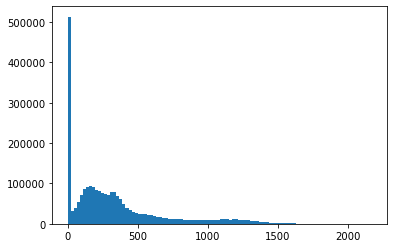

In [ ]:
plt.hist(image.numpy().flatten(), 100)